# **Machine Learning** _Day 78_
##### Name: Muhammad Hassaan
##### Date: July 26, 2024
##### Email: muhammadhassaan7896@gmail.com

# **KNN**

In [1]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# load the dataset 
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
# split the data into X and y 
X = df.drop('species', axis = 1)
y = df['species']

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



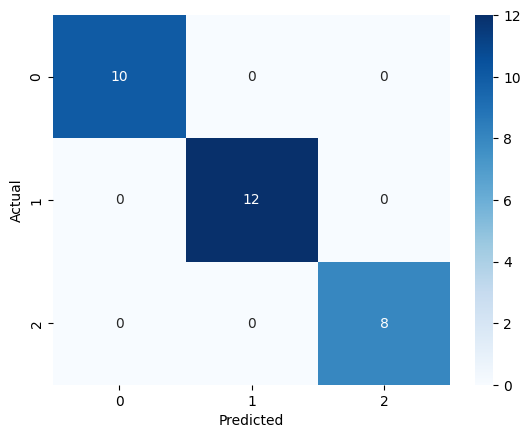

In [7]:
# train test split the data 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 101)

# call the model 
model = KNeighborsClassifier(n_neighbors = 3)

# fit the model
model.fit(X_train, y_train)

# predict the model
y_pred = model.predict(X_test)

# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# plot the confusion matrix 
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Regression Using KNN**

In [8]:
# regression problem on tips dataset 

# load the dataset 
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
# split the data into X and y 
X = df.drop('tip', axis = 1)
y = df['tip']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
# encode the categorical columns using for loop and labelencoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in X.columns:
    if X[i].dtypes == 'object' or X[i].dtype == 'category':
        X[i] = le.fit_transform(X[i])    

In [12]:
# train test split the data 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 101)

In [13]:
# call the model 
model = KNeighborsRegressor(n_neighbors = 3)

# fit the model
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [14]:
# predict the model
y_pred = model.predict(X_test)

In [15]:
# evaluate the model 

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.9681632653061225
1.78679410430839
0.25372519734551013


In [16]:
X_test.head()

,total_bill,sex,smoker,day,time,size
151,13.13,1,0,2,0,2
34,17.78,1,0,1,0,2
109,14.31,0,1,1,0,2
4,24.59,0,0,2,0,4
114,25.71,0,0,2,0,3


In [17]:
# predict a specific value 
model.predict([[25, 1, 0, 2, 0, 3]])

c:\Users\muham\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([3.39666667])